# A

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imageio

# Importing scikit-learn libraries
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Importing additional libraries
from mpl_toolkits.mplot3d import Axes3D
from mlxtend.plotting import plot_decision_regions

# Ensuring all necessary modules are imported


In [2]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names, target_names = iris.feature_names, iris.target_names

# Create a DataFrame from the iris data
df = pd.DataFrame(data=X, columns=feature_names)

# Display the shape of X and y
print(f"Feature matrix shape: {X.shape}, Target vector shape: {y.shape}")

# Print available attributes and methods of the iris dataset
print("Attributes and methods of the iris dataset:")
print(dir(iris))

# Print the description of the iris dataset
print("\nDescription of the iris dataset:")
print(iris.DESCR)

Feature matrix shape: (150, 4), Target vector shape: (150,)
Attributes and methods of the iris dataset:
['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']

Description of the iris dataset:
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7

In [3]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names, target_names = iris.feature_names, iris.target_names

# Create a DataFrame from the iris data
df = pd.DataFrame(data=X, columns=feature_names)

# Display the shape of X and y
print(f"Feature matrix shape: {X.shape}, Target vector shape: {y.shape}")

# Function to print attributes and their values of the iris dataset
def print_iris_attributes(dataset):
    attributes = [attr for attr in dir(dataset) if not attr.startswith('_')]
    for attr in attributes:
        print(f"{attr}: {getattr(dataset, attr)}")

# Print attributes and values of the iris dataset
print("\nAttributes and values of the iris dataset:")
print_iris_attributes(iris)



Feature matrix shape: (150, 4), Target vector shape: (150,)

Attributes and values of the iris dataset:
DESCR: .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    p

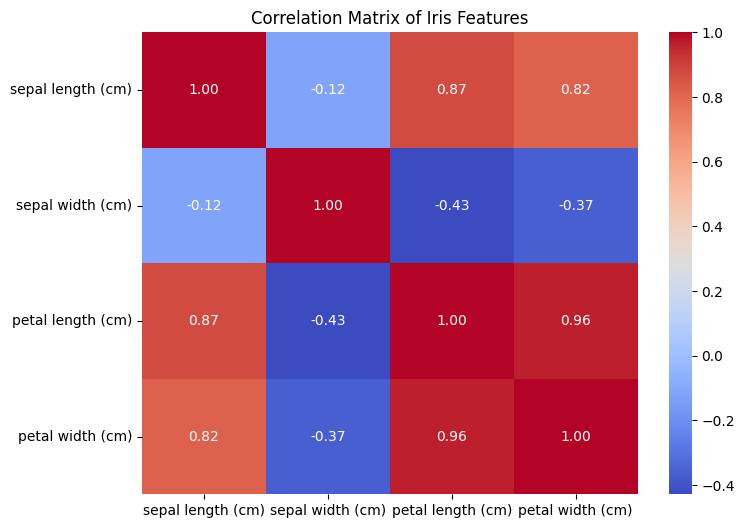

In [4]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Iris Features')
plt.show()

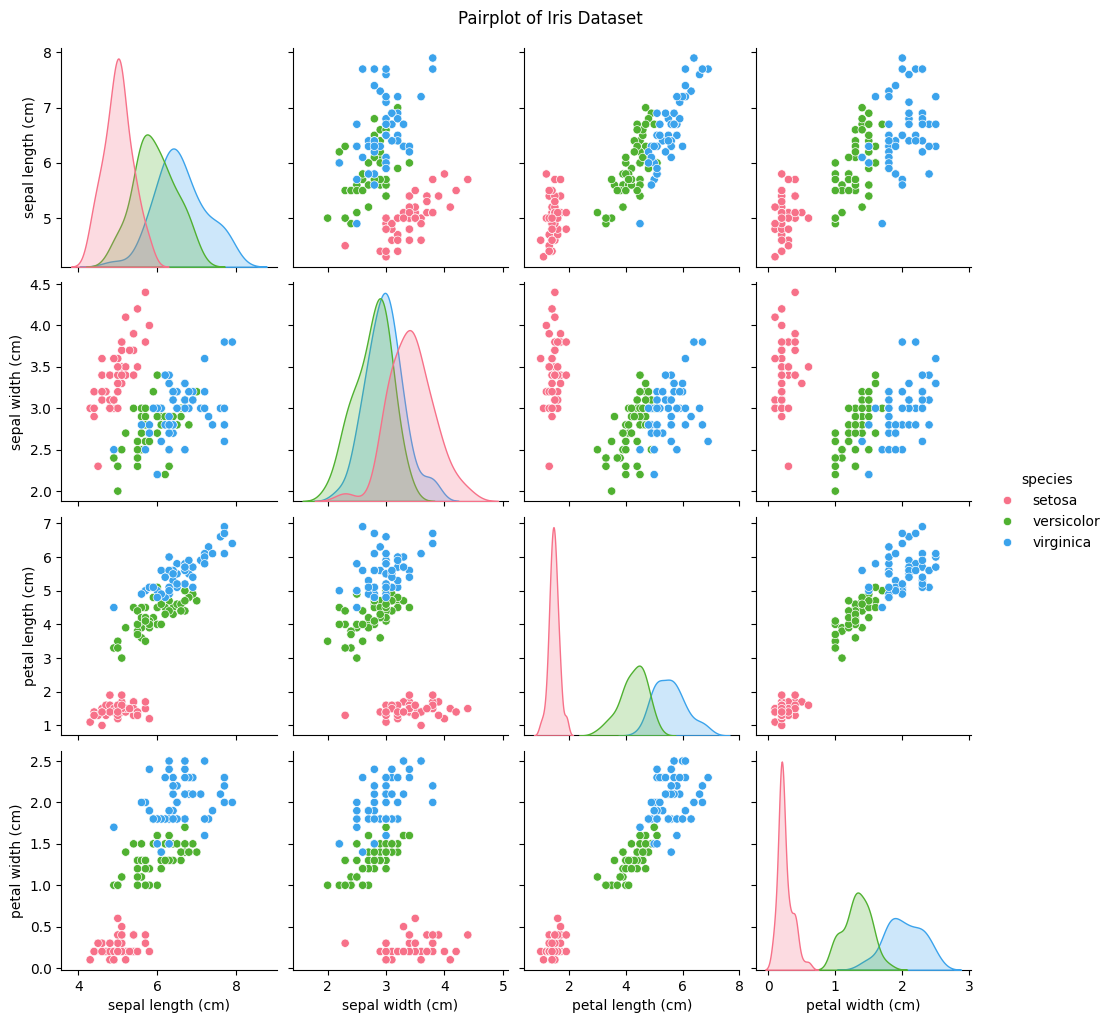

In [7]:

# Add species column to the DataFrame
df['species'] = pd.Categorical.from_codes(y, target_names)

# Define a custom color palette
custom_palette = sns.color_palette("husl", len(target_names))

# Plot the pairplot with the custom color palette
sns.pairplot(df, hue='species', palette=custom_palette)
plt.suptitle('Pairplot of Iris Dataset', y=1.02)  # Adjust the title position
plt.show()


t-sne

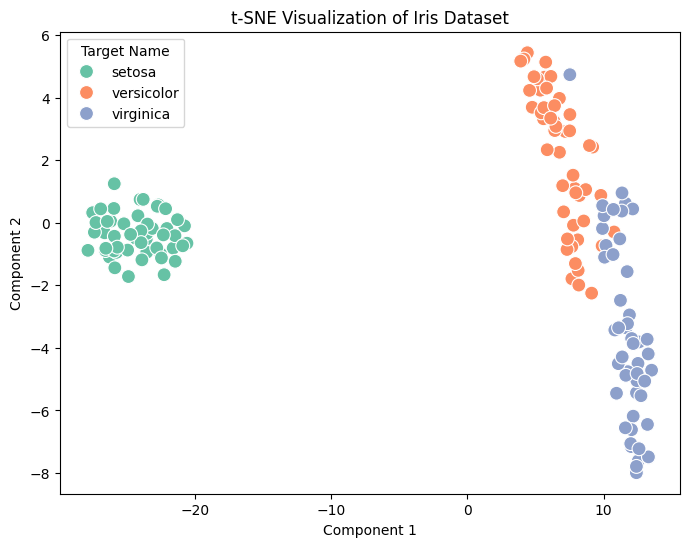

In [9]:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=34)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame for the t-SNE data
df_tsne = pd.DataFrame(X_tsne, columns=['Component 1', 'Component 2'])
df_tsne['Target'] = y
df_tsne['Target Name'] = df_tsne['Target'].apply(lambda i: target_names[i])

# Define a custom color palette
custom_palette = sns.color_palette("Set2", len(target_names))

# Plot the t-SNE results with the custom color palette
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x='Component 1', y='Component 2', hue='Target Name', palette=custom_palette, s=100)
plt.title('t-SNE Visualization of Iris Dataset')
plt.show()


PCA

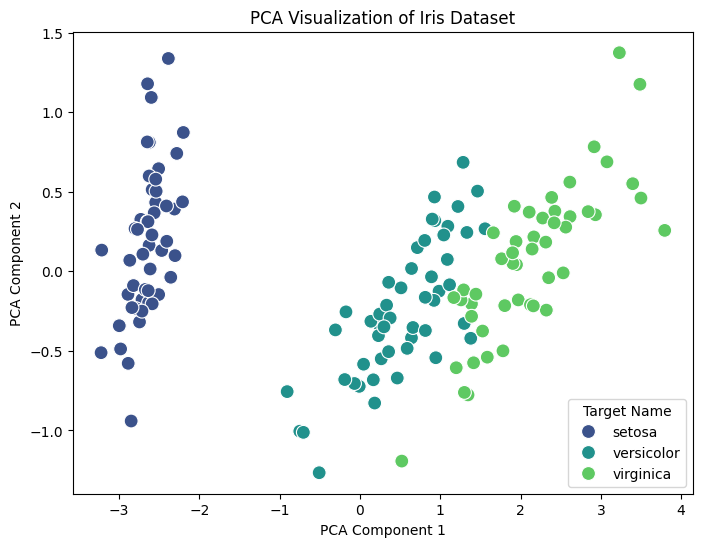

Explained variance ratio: [0.92461872 0.05306648]


In [10]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame for the PCA data
df_pca = pd.DataFrame(X_pca, columns=['PCA Component 1', 'PCA Component 2'])
df_pca['Target'] = y
df_pca['Target Name'] = df_pca['Target'].apply(lambda i: target_names[i])

# Define a custom color palette
custom_palette = sns.color_palette("viridis", len(target_names))

# Plot the PCA results with the custom color palette
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA Component 1', y='PCA Component 2', hue='Target Name', palette=custom_palette, s=100)
plt.title('PCA Visualization of Iris Dataset')
plt.show()

# Print the explained variance ratio
print("Explained variance ratio:", explained_variance)


LDA

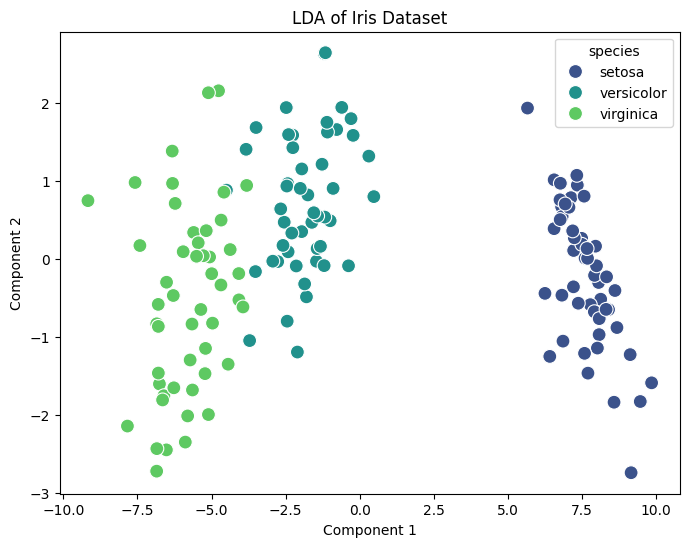

In [11]:
# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Create a DataFrame for the LDA data
df_lda = pd.DataFrame(X_lda, columns=['Component 1', 'Component 2'])
df_lda['species'] = pd.Categorical.from_codes(y, target_names)

# Define a custom color palette
custom_palette = sns.color_palette("viridis", len(target_names))

# Plot the LDA results with the custom color palette
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_lda, x='Component 1', y='Component 2', hue='species', palette=custom_palette, s=100)
plt.title('LDA of Iris Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


Drop Features

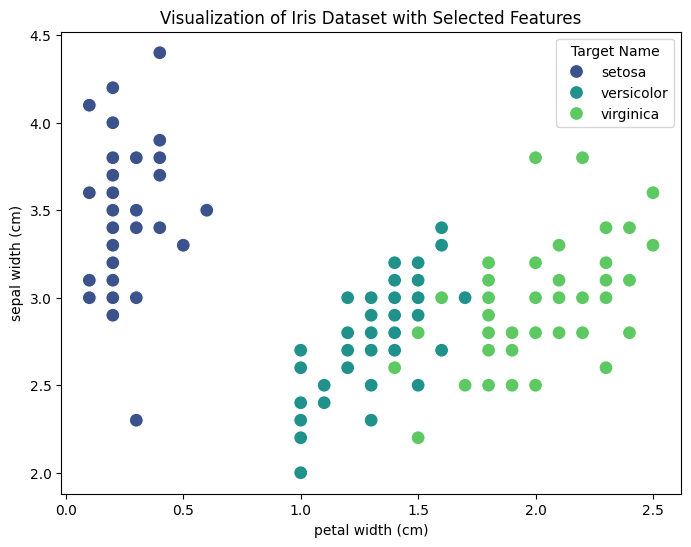

In [13]:
# Drop specific columns and add target information
df_2 = df.drop(['petal length (cm)', 'sepal length (cm)'], axis=1)
df_2['Target'] = y
df_2['Target Name'] = df_2['Target'].apply(lambda i: target_names[i])

# Plot the results with the dropped columns
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_2, x='petal width (cm)', y='sepal width (cm)', hue='Target Name', palette='viridis', s=100)
plt.title('Visualization of Iris Dataset with Selected Features')
plt.show()


# B

In [14]:

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=24)

# Display the shapes of the training and testing sets
print(f"Training feature matrix shape: {X_train.shape}")
print(f"Testing feature matrix shape: {X_test.shape}")
print(f"Training target vector shape: {y_train.shape}")
print(f"Testing target vector shape: {y_test.shape}")


Training feature matrix shape: (120, 4)
Testing feature matrix shape: (30, 4)
Training target vector shape: (120,)
Testing target vector shape: (30,)


In [17]:
# Create and train the SVM model with a linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = svm.predict(X_test)

# Print the accuracy score on the test set
print(f"Accuracy on test data: {svm.score(X_test, y_test):.2f}")

# Calculate and print the confusion matrix for the test data
cm_test = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix of test data:")
print(cm_test)

# Print the SVM model parameters (weights and bias)
print(f"Weights: {svm.coef_[0]}")
print(f"Bias: {svm.intercept_[0]}")

# Make predictions on all data
y_pred_all = svm.predict(X_scaled)

# Calculate and print the confusion matrix for all data
cm_all = confusion_matrix(y, y_pred_all)
print("\nConfusion Matrix of all data:")
print(cm_all)


Accuracy on test data: 0.97

Confusion Matrix of test data:
[[10  0  0]
 [ 0  3  1]
 [ 0  0 16]]
Weights: [-0.46020088  0.33751306 -0.8639836  -0.93632798]
Bias: -1.4759502026067934

Confusion Matrix of all data:
[[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]


PCA

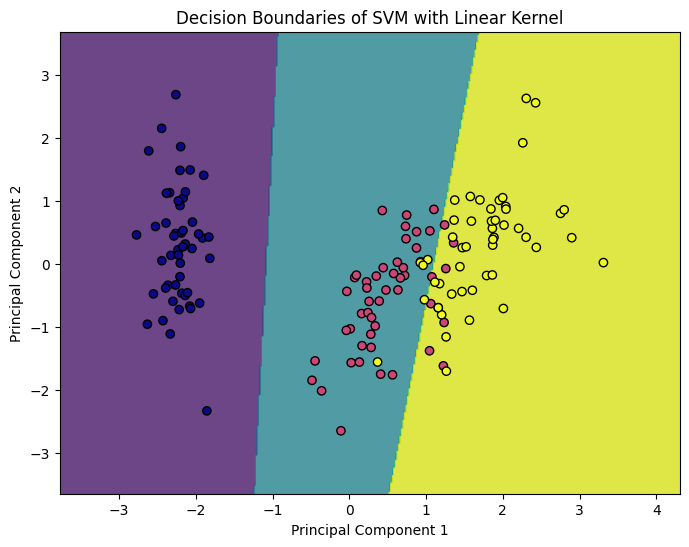

In [18]:
# Reducing the four features to two using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Define the SVM model and fit it to the scaled data
svm = SVC(kernel='linear')
svm.fit(X_scaled, y)

# Define the mesh grid for plotting decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the SVM decision function on the grid
Z = svm.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundaries with a custom colormap
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')  # Change colormap here
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap='plasma')  # Change colormap here
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries of SVM with Linear Kernel')
plt.show()


2 features

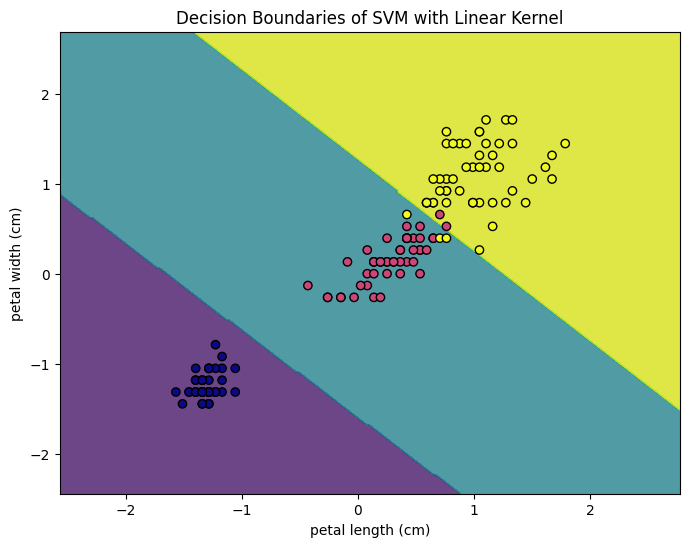

In [22]:
# Select the two most important features for visualization
feature1_index = 2  # Petal length in iris dataset
feature2_index = 3  # Petal width in iris dataset

# Create a mesh grid for plotting decision boundaries using the two selected features
x_min, x_max = X_scaled[:, feature1_index].min() - 1, X_scaled[:, feature1_index].max() + 1
y_min, y_max = X_scaled[:, feature2_index].min() - 1, X_scaled[:, feature2_index].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the mesh grid
# Create a full feature array for prediction
Z = np.array([
    svm.predict([[
        xx.ravel()[i] if j == feature1_index else yy.ravel()[i] if j == feature2_index else 0
        for j in range(X.shape[1])
    ]])[0]
    for i in range(xx.ravel().shape[0])
])

Z = Z.reshape(xx.shape)

# Plot the decision boundaries and the data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')  # Change colormap here
plt.scatter(X_scaled[:, feature1_index], X_scaled[:, feature2_index], c=y, cmap='plasma', edgecolors='k')  # Change colormap here
plt.xlabel(iris.feature_names[feature1_index])
plt.ylabel(iris.feature_names[feature2_index])
plt.title('Decision Boundaries of SVM with Linear Kernel')
plt.show()


with SVM

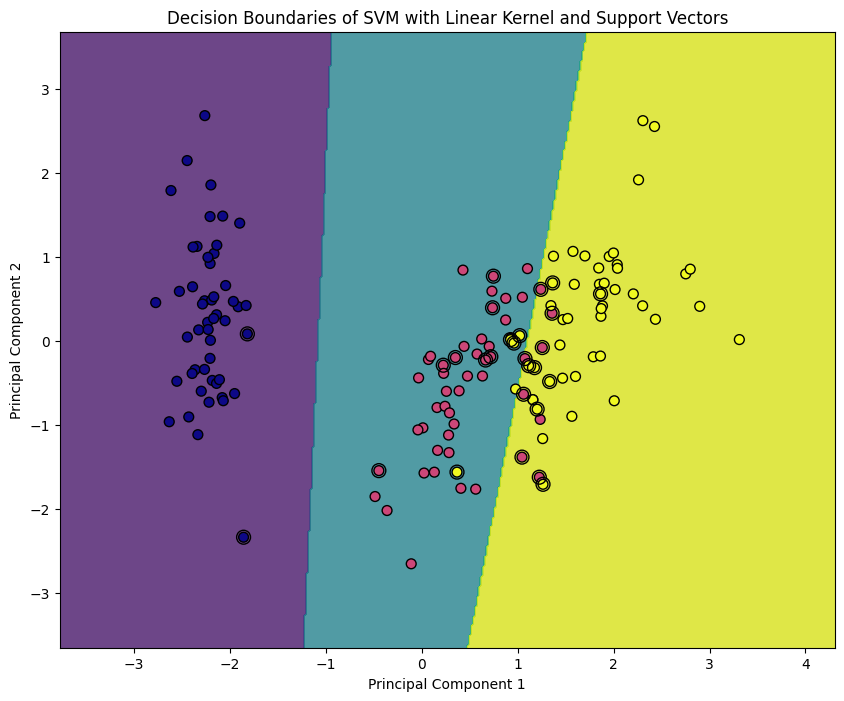

In [24]:
# Train the SVM on the four features
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Reduce the four features to two using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the mesh grid
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = svm.predict(pca.inverse_transform(mesh_points))
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma', edgecolors='k', s=50)

# Identify the support vectors and transform them to PCA space
support_vectors = svm.support_vectors_
support_vectors_pca = pca.transform(support_vectors)

# Plot the support vectors
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

# Label axes and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries of SVM with Linear Kernel and Support Vectors')
plt.show()


# C

Best degree found by GridSearchCV: 1
Accuracy with best degree: 1.0000
Degree 1: Accuracy = 1.0000
Degree 2: Accuracy = 0.9000
Degree 3: Accuracy = 0.9000
Degree 4: Accuracy = 0.9000
Degree 5: Accuracy = 0.9000
Degree 6: Accuracy = 0.9000
Degree 7: Accuracy = 0.9000
Degree 8: Accuracy = 0.9000
Degree 9: Accuracy = 0.9000
Degree 10: Accuracy = 0.8667


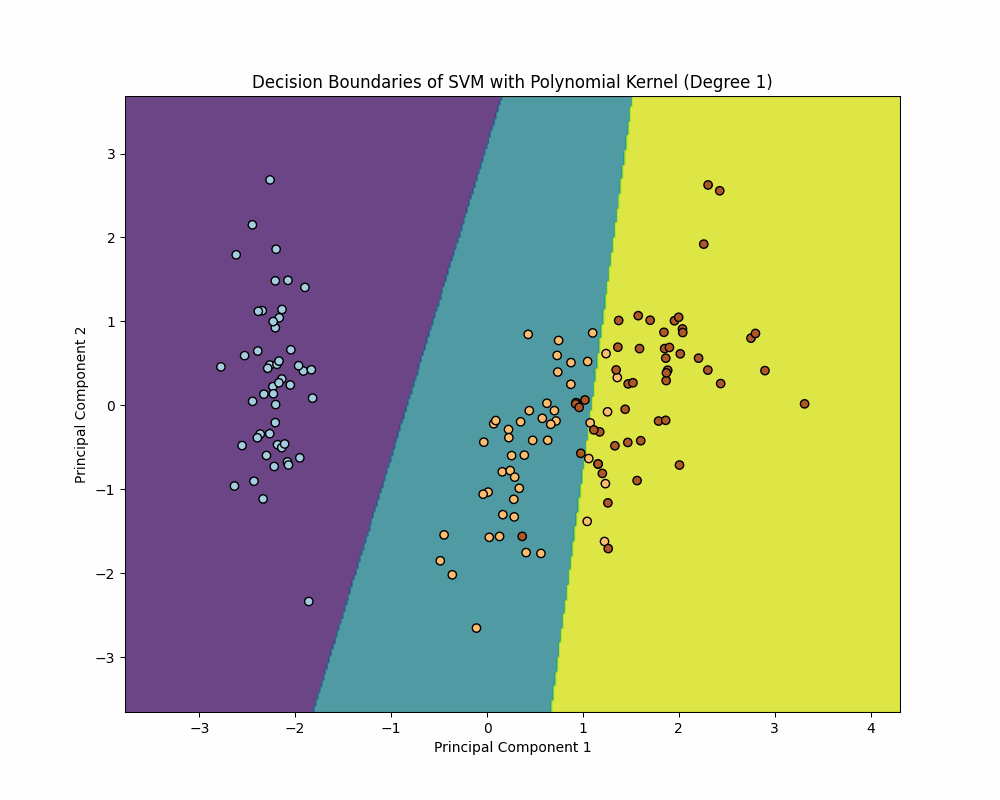

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import imageio.v2 as imageio
import os

# Load Iris dataset
data = load_iris()
X = data.data
y = data.target

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=34)

# Apply PCA to reduce the dataset to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Define the SVM model and parameters for GridSearchCV
svm_poly = SVC(kernel='poly')
param_grid = {'degree': np.arange(1, 11)}
grid_search = GridSearchCV(svm_poly, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best degree found by GridSearchCV
best_degree = grid_search.best_params_['degree']
print(f"Best degree found by GridSearchCV: {best_degree}")

# Train and evaluate the model with the best degree
svm_best = SVC(kernel='poly', degree=best_degree)
svm_best.fit(X_train, y_train)
y_pred_best = svm_best.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best degree: {best_accuracy:.4f}")

# Plot decision boundaries for degrees 1 to 10
images = []
results = {}

for degree in range(1, 11):
    svm_poly = SVC(kernel='poly', degree=degree)
    svm_poly.fit(X_train, y_train)
    y_pred = svm_poly.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[degree] = accuracy
    print(f'Degree {degree}: Accuracy = {accuracy:.4f}')

    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    Z = svm_poly.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Decision Boundaries of SVM with Polynomial Kernel (Degree {degree})')
    image_path = f'degree_{degree}.png'
    plt.savefig(image_path)
    images.append(imageio.imread(image_path))
    plt.close()

# Directory where the GIF will be saved
gif_directory = './gif'
if not os.path.exists(gif_directory):
    os.makedirs(gif_directory)

# Save GIF
gif_path = os.path.join(gif_directory, 'svm_polynomial_degrees_with_support_vectors.gif')
imageio.mimsave(gif_path, images, loop=5, fps=2)

# View the generated GIF
from IPython.display import Image
Image(filename=gif_path)


# D

Training Accuracy: 98.33%
Test Accuracy: 96.67%


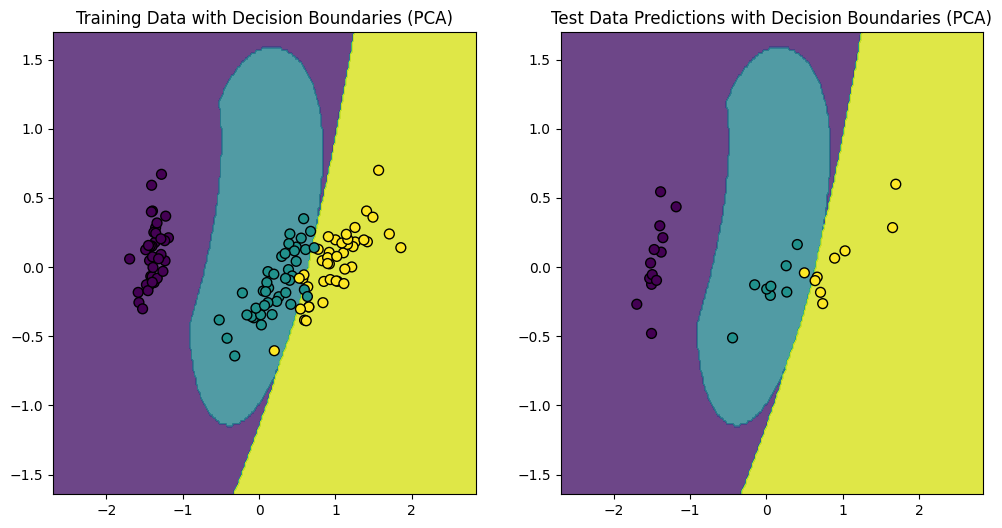

In [30]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import cvxopt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
X = (X - X.mean(axis=0)) / X.std()

# Shuffle the data
np.random.seed(1234)
indices = np.random.permutation(len(y))
X = X[indices]
y = y[indices]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

# Define kernel functions
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, C=1.0, d=3):
    return (np.dot(x, y) + C) ** d

def gaussian_kernel(x, y, gamma=0.5):
    return np.exp(-gamma * np.linalg.norm(x - y) ** 2)

def sigmoid_kernel(x, y, alpha=1, C=0.01):
    return np.tanh(alpha * np.dot(x, y) + C)

# SVM implementation with different kernel functions
def SVM1(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    n_samples, n_features = X.shape
    # Compute the Gram matrix
    K = np.zeros((n_samples, n_samples))
    if kernel_type == 'linear':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = linear_kernel(X[i], X[j])
    elif kernel_type == 'polynomial':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = polynomial_kernel(X[i], X[j], poly_params[0], poly_params[1])
    elif kernel_type == 'RBF':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = gaussian_kernel(X[i], X[j], RBF_params)
    elif kernel_type == 'sigmoid':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = sigmoid_kernel(X[i], X[j], sigmoid_params[0], sigmoid_params[1])
    else:
        raise ValueError("Invalid kernel type")

    # Construct P, q, A, b, G, h matrices for CVXOPT
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1, n_samples))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.vstack((np.diag(np.ones(n_samples) * -1), np.identity(n_samples))))
    h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))

    # Solve QP problem
    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)

    # Lagrange multipliers
    a = np.ravel(solution['x'])

    # Support vectors have non-zero Lagrange multipliers
    sv = a > 1e-5  # Some small threshold
    ind = np.arange(len(a))[sv]
    a = a[sv]
    sv_x = X[sv]
    sv_y = y[sv]

    # Bias
    bias = 0
    for n in range(len(a)):
        bias += sv_y[n]
        bias -= np.sum(a * sv_y * K[ind[n], sv])
    bias = bias / len(a)

    # Weight vector for linear kernel
    if kernel_type == 'linear':
        w = np.zeros(n_features)
        for n in range(len(a)):
            w += a[n] * sv_y[n] * sv_x[n]
    else:
        w = None

    # Prediction
    if w is not None:
        y_pred = np.sign(np.dot(X_t, w) + bias)
    else:
        y_predict = np.zeros(len(X_t))
        for i in range(len(X_t)):
            s = 0
            for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                if kernel_type == 'linear':
                    s += a1 * sv_y1 * linear_kernel(X_t[i], sv1)
                if kernel_type == 'RBF':
                    s += a1 * sv_y1 * gaussian_kernel(X_t[i], sv1, RBF_params)
                if kernel_type == 'polynomial':
                    s += a1 * sv_y1 * polynomial_kernel(X_t[i], sv1, poly_params[0], poly_params[1])
                if kernel_type == 'sigmoid':
                    s += a1 * sv_y1 * sigmoid_kernel(X_t[i], sv1, sigmoid_params[0], sigmoid_params[1])
            y_predict[i] = s
        y_pred = np.sign(y_predict + bias)

    return w, bias, solution, a, sv_x, sv_y, y_pred

# Multiclass SVM using one-vs-rest approach
def multiclass_svm(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    class_labels = list(set(y))
    classifiers = {}

    for class_label in class_labels:
        binary_y = np.where(y == class_label, 1.0, -1.0)
        w, bias, _, a, sv_x, sv_y, prediction = SVM1(
            X, X_t, binary_y, C, kernel_type, poly_params, RBF_params, sigmoid_params)
        classifiers[class_label] = prediction

    def decision_function(X_t):
        decision_scores = np.zeros((X_t.shape[0], len(class_labels)))
        for i, label in enumerate(class_labels):
            decision_scores[:, i] = classifiers[label]
        return np.argmax(decision_scores, axis=1)

    return decision_function(X_t)

# Train SVM with all features
y_pred_train = multiclass_svm(x_train, x_train, y_train, C=1.0, kernel_type='RBF', RBF_params=0.5)
y_pred_test = multiclass_svm(x_train, x_test, y_train, C=1.0, kernel_type='RBF', RBF_params=0.5)

# Print training and test accuracy
train_accuracy = np.mean(y_pred_train == y_train)
test_accuracy = np.mean(y_pred_test == y_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Use PCA for visualization
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_original_space = pca.inverse_transform(grid_points)

# Predict the decision boundaries
Z = multiclass_svm(x_train, grid_points_original_space, y_train, C=1.0, kernel_type='RBF', RBF_params=0.5)
Z = Z.reshape(xx.shape)

# Visualize the results with decision boundaries
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title('Training Data with Decision Boundaries (PCA)')

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_pred_test, cmap='viridis', edgecolor='k', s=50)
plt.title('Test Data Predictions with Decision Boundaries (PCA)')

plt.show()


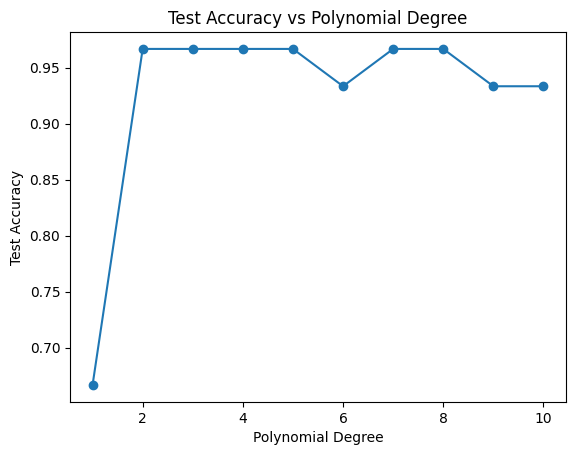

GIF saved as 'Q1D_polynomial_kernel_degrees.gif'
Accuracy for degrees 1 to 10:
Degree 1: 0.67
Degree 2: 0.97
Degree 3: 0.97
Degree 4: 0.97
Degree 5: 0.97
Degree 6: 0.93
Degree 7: 0.97
Degree 8: 0.97
Degree 9: 0.93
Degree 10: 0.93


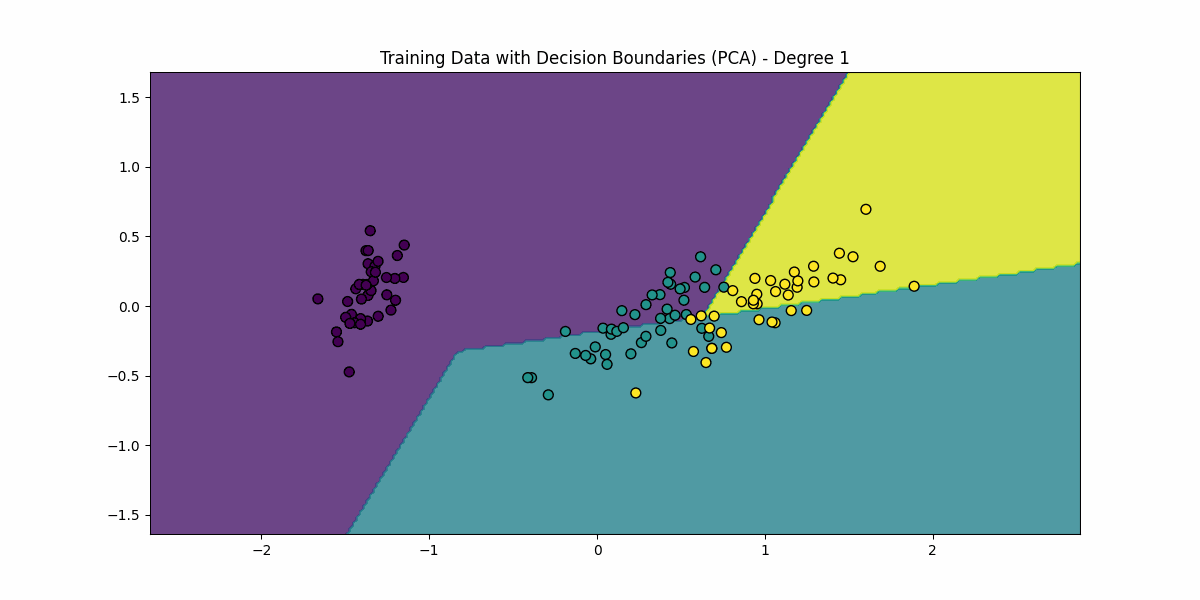

In [45]:
# Import necessary libraries
from sklearn.datasets import load_iris
import numpy as np
import cvxopt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import imageio.v2 as imageio
import os
from IPython.display import Image, display

# Define the directory in Colab to store the GIF
output_dir = '/content/gif'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
X = (X - X.mean(axis=0)) / X.std()

# Shuffle the data
np.random.seed(1234)
indices = np.random.permutation(len(y))
X = X[indices]
y = y[indices]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, C=1.0, d=3):
    return (np.dot(x, y) + C) ** d

def gaussian_kernel(x, y, gamma=0.5):
    return np.exp(-gamma * np.linalg.norm(x - y) ** 2)

def sigmoid_kernel(x, y, alpha=1, C=0.01):
    return np.tanh(alpha * np.dot(x, y) + C)

def SVM1(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    kernel_and_params = (kernel_type, poly_params, RBF_params, sigmoid_params, C)
    n_samples, n_features = X.shape
    # Compute the Gram matrix
    K = np.zeros((n_samples, n_samples))
    if kernel_type == 'linear':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = linear_kernel(X[i], X[j])
    elif kernel_type == 'polynomial':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = polynomial_kernel(X[i], X[j], poly_params[0], poly_params[1])
    elif kernel_type == 'RBF':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = gaussian_kernel(X[i], X[j], RBF_params)
    elif kernel_type == 'sigmoid':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = sigmoid_kernel(X[i], X[j], sigmoid_params[0], sigmoid_params[1])
    else:
        raise ValueError("Invalid kernel type")

    # Construct P, q, A, b, G, h matrices for CVXOPT
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1, n_samples))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.vstack((np.diag(np.ones(n_samples) * -1), np.identity(n_samples))))
    h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))

    # Solve QP problem
    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)

    # Lagrange multipliers
    a = np.ravel(solution['x'])

    # Support vectors have non-zero Lagrange multipliers
    sv = a > 1e-5  # Some small threshold
    ind = np.arange(len(a))[sv]
    a = a[sv]
    sv_x = X[sv]
    sv_y = y[sv]
    numbers_of_sv = len(sv_y)

    # Bias (For linear it is the intercept)
    bias = 0
    for n in range(len(a)):
        # For all support vectors
        bias += sv_y[n]
        bias -= np.sum(a * sv_y * K[ind[n], sv])
    bias = bias / len(a)

    # Weight vector
    if kernel_type == 'linear':
        w = np.zeros(n_features)
        for n in range(len(a)):
            w += a[n] * sv_y[n] * sv_x[n]
    else:
        w = None

    # Create the decision boundary for the plots. Calculates the hypothesis
    if w is not None:
        y_pred = np.sign(np.dot(X_t, w) + bias)
    else:
        y_predict = np.zeros(len(X_t))
        for i in range(len(X_t)):
            s = 0
            for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                # a: Lagrange multipliers, sv: support vectors
                # Hypothesis: sign(sum^S a * y * kernel + b)
                if kernel_type == 'linear':
                    s += a1 * sv_y1 * linear_kernel(X_t[i], sv1)
                if kernel_type == 'RBF':
                    s += a1 * sv_y1 * gaussian_kernel(X_t[i], sv1, RBF_params)
                if kernel_type == 'polynomial':
                    s += a1 * sv_y1 * polynomial_kernel(X_t[i], sv1, poly_params[0], poly_params[1])
                if kernel_type == 'sigmoid':
                    s += a1 * sv_y1 * sigmoid_kernel(X_t[i], sv1, sigmoid_params[0], sigmoid_params[1])
            y_predict[i] = s
        y_pred = np.sign(y_predict + bias)

    return w, bias, solution, a, sv_x, sv_y, y_pred, kernel_and_params

def multiclass_svm(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    # Step 1: Identify unique class labels
    class_labels = list(set(y))

    # Step 2: Initialize classifiers dictionary
    classifiers = {}
    w_catch = {}  # Catching w, b only for plot part
    b_catch = {}
    a_catch = {}
    sv_x_catch = {}
    sv_y_catch = {}

    # Step 3: Train binary SVM models for each required class combination
    for class_label in class_labels:
        # Create binary labels for current class vs. all others
        binary_y = np.where(y == class_label, 1.0, -1.0)
        # Train SVM classifier for binary classification
        w, bias, _, a, sv_x, sv_y, prediction, kernel_and_params = SVM1(
            X, X_t, binary_y, C, kernel_type, poly_params, RBF_params, sigmoid_params)
        classifiers[class_label] = prediction
        w_catch[class_label] = w
        b_catch[class_label] = bias
        a_catch[class_label] = a
        sv_x_catch[class_label] = sv_x
        sv_y_catch[class_label] = sv_y

    def decision_function(X_t):
        decision_scores = np.zeros((X_t.shape[0], len(class_labels)))
        for i, label in enumerate(class_labels):
            decision_scores[:, i] = classifiers[label]
        return np.argmax(decision_scores, axis=1), kernel_and_params, w_catch, b_catch, classifiers

    return decision_function(X_t)

# Use PCA for visualization
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Store the images for the GIF
images = []
accuracies = []

for degree in range(1, 11):
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_original_space = pca.inverse_transform(grid_points)

    # Predict the decision boundaries
    _, _, _, _, classifiers = multiclass_svm(
        x_train, grid_points_original_space, y_train, C=1.0, kernel_type='polynomial', poly_params=(1, degree))

    # Reshape the predictions to match the grid shape
    Z = np.argmax(np.vstack([classifiers[class_label] for class_label in sorted(set(y_train))]), axis=0)
    Z = Z.reshape(xx.shape)

    # Visualize the results with decision boundaries
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    ax.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
    ax.set_title(f'Training Data with Decision Boundaries (PCA) - Degree {degree}')

    # Save the figure
    plt.savefig(f'Q1D_degree_{degree}.png')
    images.append(imageio.imread(f'Q1D_degree_{degree}.png'))
    plt.close(fig)

    # Evaluate accuracy
    y_pred_test, _, _, _, _ = multiclass_svm(
        x_train, x_test, y_train, C=1.0, kernel_type='polynomial', poly_params=(1, degree))
    test_accuracy = np.mean(y_pred_test == y_test)
    accuracies.append(test_accuracy)

# Create GIF
gif_path = os.path.join(output_dir, 'Q1D_polynomial_kernel_degrees.gif')
imageio.mimsave(gif_path, images, loop=5, fps=2)

# Plot accuracy for different degrees
plt.figure()
plt.plot(range(1, 11), accuracies, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Polynomial Degree')
plt.grid(False)
plt.show()

print("GIF saved as 'Q1D_polynomial_kernel_degrees.gif'")
print("Accuracy for degrees 1 to 10:")
for degree, accuracy in enumerate(accuracies, start=1):
    print(f"Degree {degree}: {accuracy:.2f}")

# Display GIF
display(Image(filename=gif_path))
